# Backpropagation

Backpropagation is the key algorithm used for training neural networks, allowing them to learn from data. It is based on the gradient descent optimization technique and works by iteratively adjusting the weights and biases of the network to minimize the error between the predicted and actual outputs. In this lab, we will create a neural network to implement backpropagation for a XOR problem

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the input and expected output for a XOR gate problem
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
d = np.array([0, 1, 1, 0])

## Declare the network parameters and the weights

Define the network parameters such as
1. number of input neurons
2. hidden layer neurons
3. output neurons
4. learning rate
5. number of epochs

Also, Declare the weights for the neurons. The initial weights are taken as random numbers which are then optimized by the backpropagation algorithm inside a function parameter `initialize_network_parameters()`

In [5]:
def initialize_network_parameters():
  inputSize = 2   # Num of input neurons
  hiddenSize = 2  # Num of hidden neurons
  outputSize = 2  # Num of output neurons
  lr = 0.1        # Learning rate
  epochs = 180000 # Num of training epochs

  w1 = np.random.rand(hiddenSize, inputSize) * 2 - 1
  b1 = np.random.rand(hiddenSize, 1) * 2 - 1
  w2 = np.random.rand(outputSize, hiddenSize) * 2 - 1
  b2 = np.random.rand(outputSize, 1) * 2 - 1

  return w1, b1, w2, b2, lr, epochs

## Training the neural network

The neural network works in 5 stages: 
1. Forward pass
    * The input **X** is multiplied by the weights **w1** and passed through the first layer, followed by the application of the sigmoid or ReLU activation function. This gives the output for the hidden layer.
    * The output of the hidden layer is then passed through the second set of weights **w2** to compute the final output. Again, a sigmoid activation function is used to generate the final output **a2**.
    
2. Error calculation
    * The error is computed as the difference between the expected output **(d)** and the actual output **(a2)**.
3. Backward pass
    * **Output Layer**: The derivative of the sigmoid activation function is applied to the error, producing the gradient for the output layer **(da2)**. This is used to calculate how much the weights in the output layer need to be adjusted.
    * **Hidden Layer**: The error is then propagated backward to the hidden layer. The gradient at the hidden layer **(da1)** is computed by taking the dot product of the transpose of the weights **(w2.T)** and the gradient from the output layer. The derivative of the activation function (sigmoid or ReLU) is used to adjust this error.
4. Weights and bias updates
    * After computing the **gradients (dz1, dz2)**, the **weights (w1, w2)** and **biases (b1, b2)** are updated using the **learning rate (lr)** and **the gradients**. The updates are done to minimize the error and improve the model’s predictions.
5. Training:
    * This entire process is repeated over many iterations **(epochs)**. During each epoch, the model adjusts its weights and biases to reduce the error. Over time, the network learns to approximate the XOR function.
Forward Pass:



In [6]:
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

error_list = []
for epoch in range(epochs):
  # Forward pass
  z1 = np.dot(w1, X) + b1
  a1 = 1 / (1 + np.exp(-z1)) 

  z2 = np.dot(w2, a1) + b2
  a2 = 1 / (1 + np.exp(-z2))

  # Error calculation and backpropagation
  error = d - a2
  da2 = error * (a2 * (1 - a2))
  dz2 = da2

  da1 = np.dot(w2.T, dz2)
  dz1 = da1 * (a1 * (1 - a1))

  # Update weights and biases
  w2 += lr * np.dot(dz2, a1.T)
  b2 += lr * np.sum(dz2, axis=1, keepdims=True)

  w1 += lr * np.dot(dz1, X.T)
  b1 += lr * np.sum(dz1, axis=1, keepdims=True)

  if (epoch + 1) % 1000 == 0:
    print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
    error_list.append(np.average(abs(error)))

Epoch: 999, Average error: 0.48726
Epoch: 1999, Average error: 0.39816
Epoch: 2999, Average error: 0.33770
Epoch: 3999, Average error: 0.15540
Epoch: 4999, Average error: 0.09985
Epoch: 5999, Average error: 0.07751
Epoch: 6999, Average error: 0.06508
Epoch: 7999, Average error: 0.05699
Epoch: 8999, Average error: 0.05121
Epoch: 9999, Average error: 0.04684
Epoch: 10999, Average error: 0.04338
Epoch: 11999, Average error: 0.04057
Epoch: 12999, Average error: 0.03822
Epoch: 13999, Average error: 0.03623
Epoch: 14999, Average error: 0.03451
Epoch: 15999, Average error: 0.03301
Epoch: 16999, Average error: 0.03168
Epoch: 17999, Average error: 0.03049
Epoch: 18999, Average error: 0.02943
Epoch: 19999, Average error: 0.02846
Epoch: 20999, Average error: 0.02759
Epoch: 21999, Average error: 0.02678
Epoch: 22999, Average error: 0.02605
Epoch: 23999, Average error: 0.02536
Epoch: 24999, Average error: 0.02473
Epoch: 25999, Average error: 0.02414
Epoch: 26999, Average error: 0.02359
Epoch: 27999

## Testing the network

In [8]:
z1 = np.dot(w1, X) + b1
a1 = 1 / (1 + np.exp(-z1))

z2 = np.dot(w2, a1) + b2
a2 = 1 / (1 + np.exp(-z2))

print('Final output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

Final output after training: [[0.00770335 0.99133084 0.99133906 0.00794956]
 [0.00772062 0.99131066 0.99131889 0.0079687 ]]
Ground truth [0 1 1 0]
Error after training: [[-0.00770337  0.00866918  0.00866097 -0.00794959]
 [-0.00772064  0.00868937  0.00868114 -0.00796872]]
Average error: 0.00826


## Plot the error

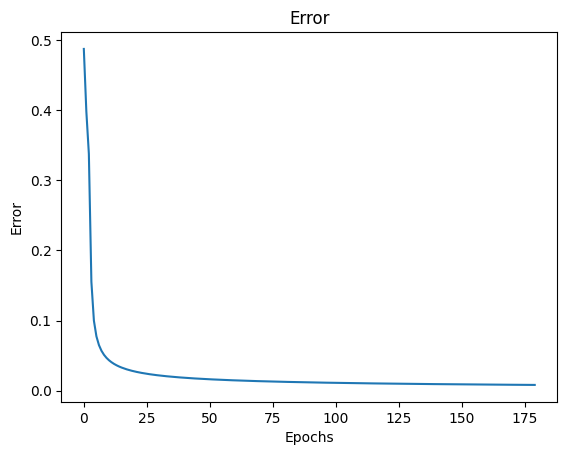

In [9]:
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## Exercise 1

Implement backpropagation for AND problem using similar input as used for XOR problem above and plot the error

Epoch: 9999, Average error: 0.02540
Epoch: 19999, Average error: 0.01659
Epoch: 29999, Average error: 0.01308
Epoch: 39999, Average error: 0.01109
Epoch: 49999, Average error: 0.00976
Epoch: 59999, Average error: 0.00879
Epoch: 69999, Average error: 0.00805
Epoch: 79999, Average error: 0.00746
Epoch: 89999, Average error: 0.00698
Epoch: 99999, Average error: 0.00657
Epoch: 109999, Average error: 0.00622
Epoch: 119999, Average error: 0.00591
Epoch: 129999, Average error: 0.00565
Epoch: 139999, Average error: 0.00541
Epoch: 149999, Average error: 0.00520
Epoch: 159999, Average error: 0.00501
Epoch: 169999, Average error: 0.00483
Epoch: 179999, Average error: 0.00467

Final output after training: [[1.88833599e-04 5.96127999e-03 3.48128223e-03 9.90919948e-01]
 [1.88359396e-04 5.95237396e-03 3.47546087e-03 9.90931571e-01]]
Ground truth [0 0 0 1]
Error after training: [[-0.00018883 -0.0059613  -0.00348129  0.00908008]
 [-0.00018836 -0.0059524  -0.00347547  0.00906846]]
Average error: 0.00467

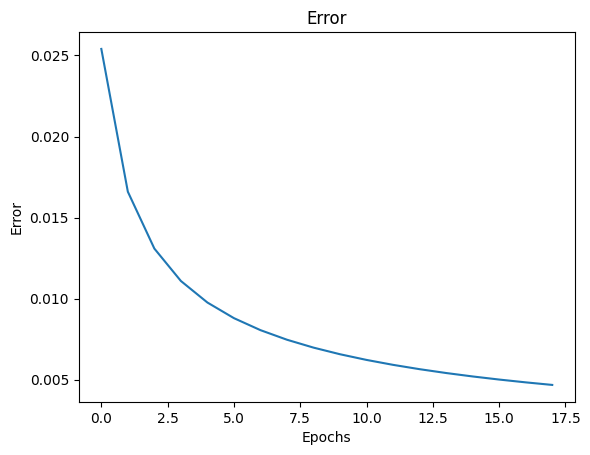

In [10]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 0, 0, 1])  # Expected output for AND

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))

# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

## Exercise 2

Now, decrease the learning rate to 0.01 and increase the number of epochs to 1000000 and check the error for XOR gate

Epoch: 9999, Average error: 0.34769
Epoch: 19999, Average error: 0.34170
Epoch: 29999, Average error: 0.33961
Epoch: 39999, Average error: 0.33850
Epoch: 49999, Average error: 0.33780
Epoch: 59999, Average error: 0.33731
Epoch: 69999, Average error: 0.33694
Epoch: 79999, Average error: 0.33666
Epoch: 89999, Average error: 0.33643
Epoch: 99999, Average error: 0.33624
Epoch: 109999, Average error: 0.33607
Epoch: 119999, Average error: 0.33594
Epoch: 129999, Average error: 0.33582
Epoch: 139999, Average error: 0.33571
Epoch: 149999, Average error: 0.33562
Epoch: 159999, Average error: 0.33553
Epoch: 169999, Average error: 0.33546
Epoch: 179999, Average error: 0.33539

Final output after training: [[0.33352784 0.99207831 0.33331982 0.33342129]
 [0.33352859 0.99207691 0.33331884 0.33342061]]
Ground truth [0 1 1 0]
Error after training: [[-0.33352785  0.00792172  0.66668018 -0.33342129]
 [-0.33352859  0.00792311  0.66668116 -0.33342061]]
Average error: 0.33539


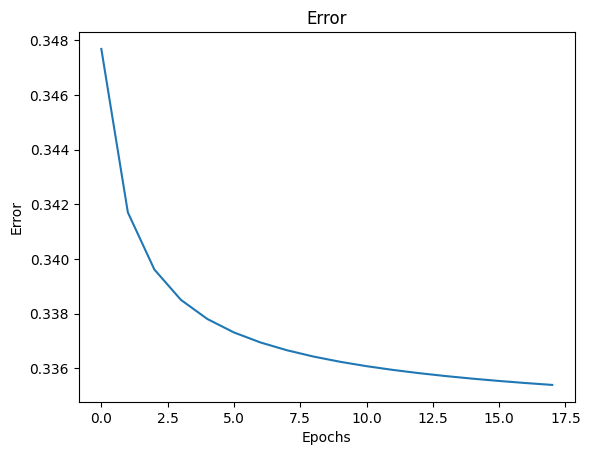

In [11]:
lr = 0.01         # Learning rate
epochs = 1000000   # Number of training epochs


# Defining inputs and expected output (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T  # 2x4 matrix, each column is a training example
d = np.array([0, 1, 1, 0])  # Expected output for XOR

# Get initialized parameters
w1, b1, w2, b2, lr, epochs = initialize_network_parameters()

# Training the network using backpropagation
error_list = []
for epoch in range(epochs):
    # Forward pass
    z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
    a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

    z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
    a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

    # Error calculation and backpropagation
    error = d - a2  # Difference between expected and actual output
    da2 = error * (a2 * (1 - a2))  # Derivative for output layer
    dz2 = da2  # Gradient for output layer

    # Propagate error to hidden layer
    da1 = np.dot(w2.T, dz2)  # Gradient for hidden layer
    dz1 = da1 * (a1 * (1 - a1))  # Derivative for hidden layer

    # Update weights and biases
    w2 += lr * np.dot(dz2, a1.T)  # Update weights from hidden to output layer
    b2 += lr * np.sum(dz2, axis=1, keepdims=True)  # Update bias for output layer

    w1 += lr * np.dot(dz1, X.T)  # Update weights from input to hidden layer
    b1 += lr * np.sum(dz1, axis=1, keepdims=True)  # Update bias for hidden layer
    if (epoch+1)%10000 == 0:
        print("Epoch: %d, Average error: %0.05f"%(epoch, np.average(abs(error))))
        error_list.append(np.average(abs(error)))


# Testing the trained network
z1 = np.dot(w1, X) + b1  # Weighted sum for hidden layer
a1 = 1 / (1 + np.exp(-z1))  # Sigmoid activation for hidden layer

z2 = np.dot(w2, a1) + b2  # Weighted sum for output layer
a2 = 1 / (1 + np.exp(-z2))  # Sigmoid activation for output layer

# Print results
print('\nFinal output after training:', a2)
print('Ground truth', d)
print('Error after training:', error)
print('Average error: %0.05f'%np.average(abs(error)))


# Plot error
plt.plot(error_list)
plt.title('Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()